In [1]:
import matplotlib.pyplot as plt
import math

#wir kriegen die daten als p(phi) mit phi als Winkel der Kurbelwelle
#und zwar als tabelle.

#der worflow wird sein, 
#daten einlesen
#phis in Volumen umrechnen
#p/V diagram zeichnen,
#fläche integrieren
#??? Arbeit in Pme umrechnen
#Pme / Umin**-1 diagramm zeichnen

#aus [...]_b_[...].xlsx , weil da die 1500 u/min waren.
Drehmomente=[31.3,
             61.1,
             94.1,
             124.3,
             155.6,
             188.2,
             219.6,
             251.1,
             282.0,
             308.2,
            ]
#wir brauchen die Tabellen für

#V ist gegeben als
#V=A_Querschnitt*(Hub(phi)+Resthöhe)

A=5 #querschnittsfläche
Bohrung=0.081#m
A=math.pi*(Bohrung/2)**2 # m
print("querfläche",A)
Hubmax=0.0955#m

Vmax=A*Hubmax 


querfläche 0.005152997350050658


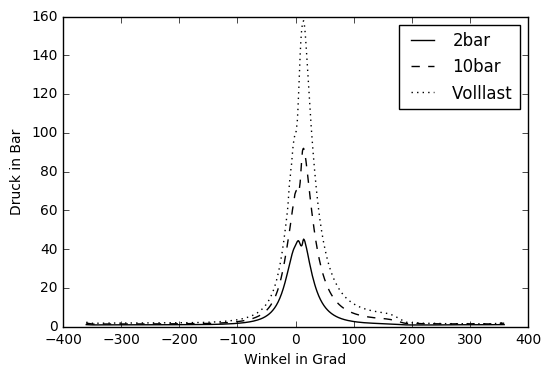

In [2]:
def convert_phi_to_rad(phi):
    
    rad=(phi/360)*math.pi*2
    return rad

def get_phis_ps(fn="2bar.csv"):

    phis=[]
    ps=[]
    winkel=[]
    with open(fn,"r") as f:
        f.readline()
        f.readline()#burn the two first, they're just stuff
        for line in f.readlines():
            line=line[:-2]#remove newline
            line=line.split(",")
            phis.append(convert_phi_to_rad(float(line[0])))#oder den wert oder wie auch immer
            winkel.append(float(line[0]))
            ps.append(float(line[1])) #ps in bar
    return phis,winkel,ps

druckwinkel=[get_phis_ps("2bar.csv"),
             get_phis_ps("10bar.csv"),
             get_phis_ps("volllast.csv")]
c=0
pair=druckwinkel[0]
plt.plot(pair[1],pair[2],color="black",label="2bar")
pair=druckwinkel[1]
plt.plot(pair[1],pair[2],color="black",linestyle="--",label="10bar")
pair=druckwinkel[2]
plt.plot(pair[1],pair[2],color="black",linestyle=":",label="Volllast")
plt.xlabel("Winkel in Grad")
plt.ylabel("Druck in Bar")
plt.legend()
plt.savefig("DruckWinkel.jpg")
plt.show()
plt.clf()

vmax 0.4921112469298378


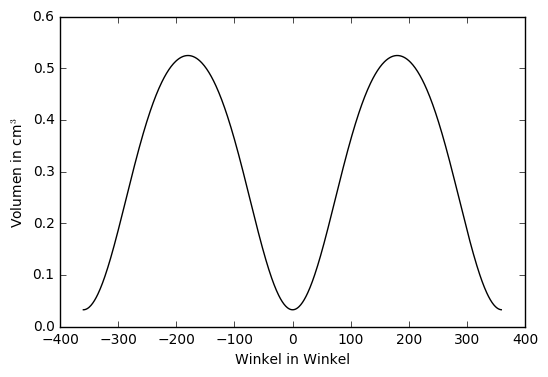

In [3]:


l=144*10**(-3)#in m pleuellänge
r = Hubmax/2#(Vmax / A*2)
lambda_s=r/l
#print(r,l,(Vmax / A*2),lambda_s)
def Hub(phi):
    #some function
    #fürs erste sollte der Sinus reichen   
    
    #dummy funktion
    #h=(Komph+1/2*Hubmax+Hubmax*math.sin(phi+3/2*math.pi))
    h = r * ( (1-math.cos(phi)) + 1/lambda_s * ( 1- (1-lambda_s**2 * math.sin(phi)**2)**0.5 ) ) 
    #jetzt richtig
    #
    #h+= Komph
    
    return h


#print(phis[0],phis[100],phis[300],phis[700])

Vs=[]
pair=druckwinkel[0]
    
phis,winkel,ps=pair
c=0
m=len(phis)
while c < m:
    phi=phis[c]
    w=winkel[c]
    #print(Hub(phi))
    V=A*Hub(phi)*1000 #ccm 
    #jetzt nur nohc hubraum
    V_t=V
    Vs.append(V_t)
    c+=1
    
newvs=[]
V_max=max(Vs)
print("vmax",V_max,)
for v in Vs:
    newvs.append(v+V_max/15.2)
Vs=newvs
#print(Hub(phi))
#print(A)
plt.plot(winkel,Vs,color="black")
plt.xlabel("Winkel in Winkel")
plt.ylabel("Volumen in cm${^3}$")
plt.savefig("VolumenWinkel.jpg")
plt.show()

plt.clf()

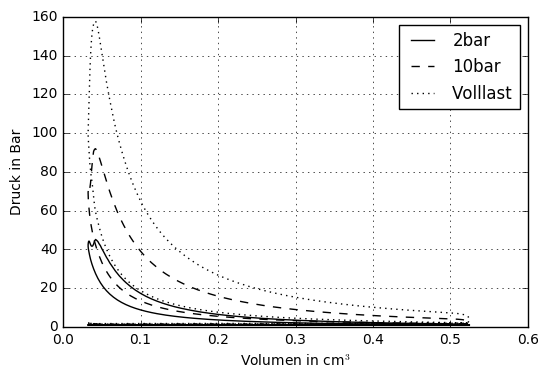

In [4]:
#print(Vs[0:100])
#Aufpassen, ich brauche entweder nur einen Ladungswechsel, oder ich muss mitteln
#unabhängig davon, habe ich
#jetzt alle Werte für p und V
#und man kann das p V diagram plotten

#dummy werte
#Vs=[4,2,2,4,1,3,4]
#ps=[2,2,1,1,8,8,2]

#plt.xlim(0.0002,0.0008)
fig, ax = plt.subplots()
Vsccm=[]
for v in Vs:
    Vsccm.append(v)
ax.grid(True)
plt.plot(Vsccm,druckwinkel[0][2],color="black",label="2bar")
plt.plot(Vsccm,druckwinkel[1][2],color="black",linestyle="--",label="10bar")
plt.plot(Vsccm,druckwinkel[2][2],color="black",linestyle=":",label="Volllast")

plt.xlabel("Volumen in cm${^3}$")
plt.ylabel("Druck in Bar")
plt.legend()
plt.savefig("PV.jpg")
plt.show()

plt.clf()



In [87]:

#numerische Flächeberechnung nach Cha Zhang
#EFFICIENT FEATURE EXTRACTION FOR 2D/3D OBJECTS
#IN MESH REPRESENTATION
def Teilfläche(p1,p2):
    A = 1/2 * ( - p2[0] * p1[1] + p1[0] * p2[1] )
    return A


Work=[]
for paar in druckwinkel:
    ps=paar[2]
    A=0
    c=180
    m=180+360
    bartopascal=10**5
    btp=bartopascal
    print(m)

    while c < m-1:
        p1=(ps[c]*btp,Vs[c])
        p2=(ps[c+1]*btp,Vs[c+1])
        Teil_A=Teilfläche(p1,p2)
        #control printout
        #print("parts",p1,p2,Teil_A)
        A+=Teil_A
        c+=1
    Work.append(A/1000)
    print("Ergebnis, Arbeit bzw. eingeschlossene Fläche:",A/1000)# ccm->m3
   

    
#p0=(ps[0],Vs[0])
#pl=(ps[-1],Vs[-1])
#ai=Teilfläche(pl,p0)
#print(ai)
#A+=ai

#gesamt_motor=A*2*(1500/60)/1000#pro sekunde in KW
#print(gesamt_motor)#pro spiel

#print(1500*A*2/1000)
#Wir haben jetzt also die Arbeit, in Nm, für einen Lastwechsel,



540
Ergebnis, Arbeit bzw. eingeschlossene Fläche: 174.88399839236303
540
Ergebnis, Arbeit bzw. eingeschlossene Fläche: 547.5426704913699
540
Ergebnis, Arbeit bzw. eingeschlossene Fläche: 1020.0242036008676


1500_002
1.5
1500_010
5.3
Volllast
10.3
7.023703575525752 12.491714170883075
34.91655834989798 39.11019074938356
69.15991827402674 72.85887168577626


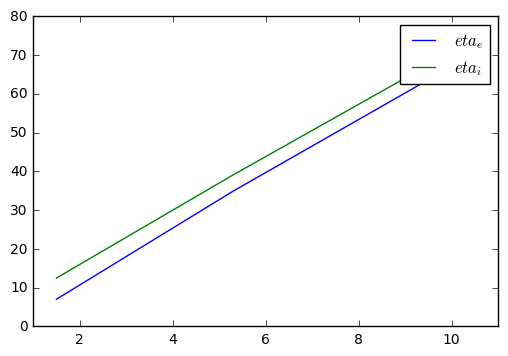

In [94]:
#Wirkungsgrade siehe folien mit formeln
#leistung gegebene / gemessen
#brennwerte der gram massenstrom
Ms=[]
m_dots=[]
with open("All_b.csv","r") as f:
    f.readline()
    f.readline()#burn the two first, they're just stuff
    for line in f.readlines():
        line=line[:-2]#remove newline
        line=line.split(",")
        
        #print(line[3])
        chosen=["1500_002","1500_010","Volllast"]
        if line[3] in chosen:
            print(line[3])
            m_dot=float(line[49])
            print(m_dot)
            M=float(line[5])
            n=1500
            Ms.append(M)
            m_dots.append(m_dot)
n=1500
P_bs=[] 
eta_is=[]
eta_es=[]
c=0
while c < 3:
    M=Ms[c]
    m_dot=m_dots[c]
    Work_i=Work[c]
    P_e=M*math.pi*2*n

    P_i=0.5*4*n*Work_i

    m_dot=1
    H_u=42000#kJ/kg

    P_brenn=m_dot*H_u
    P_bs.append(P_brenn)
    eta_e=P_e/P_brenn
    eta_i=P_i/P_brenn
    eta_es.append(eta_e)
    eta_is.append(eta_i)
    print(eta_e,eta_i)
    c+=1

plt.plot(m_dots,eta_es,label="$eta_e$")
plt.plot(m_dots,eta_is,label="$eta_i$")
plt.legend()
plt.show()




['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']
9 9
8 9


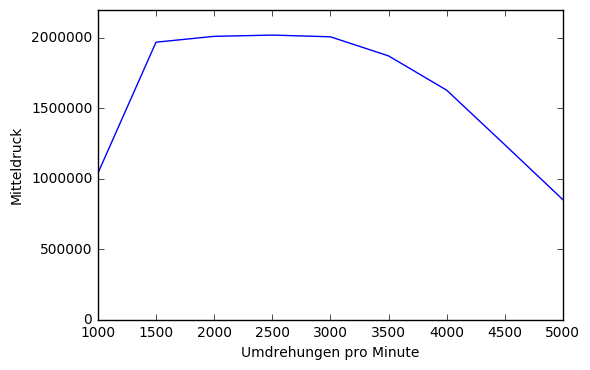

In [74]:
#Als nächsten Schritt, zur Berechnung des Motorkennfelds
#brauchen wir den Mitteldruck...

#ähm...


#b_e=massenstrom/leistung
letters="a b c d e f g h i"
letters=letters.split(" ")
print(letters)

fn="All_i.csv"


#öffnet alle Dateien mit den Buchstaben, die haben jeweils eine Drehzahl...l
#die Kurve oben die als Maske verwendet wird ist die Volllastleistung

P_mes_voll=[]
P_mes=[]
all_us=[]
b_es=[]
Us=[]
for letter in letters:
    fn="All_"+letter+".csv"
    with open(fn,"r") as f:
        f.readline()
        f.readline()#burn the two first, they're just stuff
        b_es.append([])
        P_mes.append([])
        Us.append([])
        for line in f.readlines():
            line=line[:-2]#remove newline
            line=line.split(",")
            m_dot=float(line[49])*1000
            #uuuugly... but there is a mistake in the data...
            if m_dot < 0:
                m_dot=8.3*1000
            P=float(line[6])
            b_e=m_dot/P
            b_es[-1].append(b_e)
            #print(m_dot,P)
            
            drehmoment=float(line[5])
            V=1968*10**(-6)
            P_me=drehmoment*4*math.pi/V
            P_mes[-1].append(P_me)
            
            Us[-1].append(int(line[4]))
            
            
            #phis.append(convert_phi_to_rad(float(line[0])))#oder den wert oder wie auch immer
            #winkel.append(float(line[0]))
            #ps.append(float(line[1])) #ps in bar
        all_us.append(int(line[4]))
        drehmoment=float(line[5])
        V=1968*10**(-6)
        P_me=drehmoment*4*math.pi/V
        P_mes_voll.append(P_me)
        
print(len(Us),len(P_mes))

c=0
m=len(Us)
while c < m:
    #print(Us[c],P_mes[c])
    c+=1
    
print(len(Us[0]),len(P_mes_voll))
plt.plot(all_us,P_mes_voll)
                  
plt.xlabel("Umdrehungen pro Minute")
plt.ylabel("Mitteldruck")
plt.ylim([0,2.2*10**6])
#plt.legend()

plt.show()
plt.clf()


In [75]:
#correcting the variables for the plot

#print(P_mes[0][:2])
#pop the two with 1500 u/min
Us[0].pop(0)
Us[0].pop(0)
P_mes[0].pop(0)
P_mes[0].pop(0)
b_es[0].pop(0)
b_es[0].pop(0)

285.71428571428567

In [76]:
#rename so I don't mess up my old stuff
print("hey")

pUs=Us
pP_mes=P_mes
pb_es=b_es


ml=0
for l in pb_es:
    #l.insert(0,0)
    if len(l)> ml:
        ml=len(l)

for l in pUs:
    while len(l)<ml:
        l.append(l[-1])#umdrehungen bleiben gleich

for l in pP_mes:
    #l.insert(0,0)#add something at 0
    while len(l)<ml:
        l.append(l[-1]*1.0001)
        #doesn't matter how big it is, just has to be bigger than the last one

for l in pb_es:
    while len(l)<ml:
        l.append(l[-1]) # must add the last value, everything else leads to colordistortion

        
fpUs=pUs
fpP_mes=pP_mes
fpb_es=pb_es
#print("yup",fpUs,fpP_mes)

hey



first
u [1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]
pme [197945.87857984472, 403554.17826600606, 595114.7059239203, 798168.8652413093, 995476.2087289611, 1037619.5248137021, 1037723.2867661834, 1037827.0590948601, 1037930.8418007696, 1038034.6348849497]
bes [312.5, 257.57575757575756, 244.89795918367346, 236.6412213740458, 233.12883435582822, 241.1764705882353, 241.1764705882353, 241.1764705882353, 241.1764705882353, 241.1764705882353]
second
u [1500, 1500, 1500, 1500, 1500, 1500, 1500, 1500, 1500, 1500]
pme [199861.48385642387, 390144.941329952, 600861.5217536577, 793699.119595958, 993560.6034523818, 1201723.0435073155, 1402223.0624559321, 1603361.616496742, 1800668.9599843938, 1967965.1541389723]
bes [306.1224489795918, 250.0, 216.2162162162162, 220.51282051282053, 217.21311475409837, 212.83783783783784, 211.59420289855072, 210.65989847715736, 212.18961625282168, 212.8099173553719]


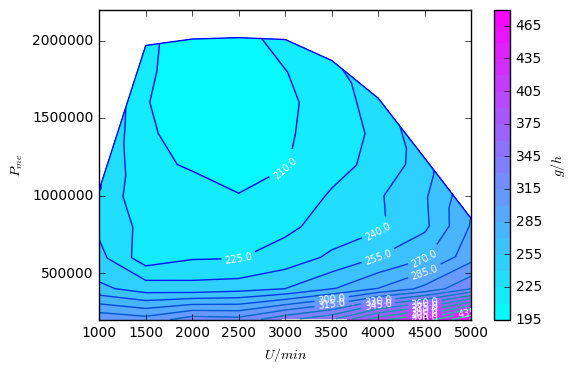

In [79]:


#Us,P_mes,b_es=correct_for_plotting(Us,P_mes,b_es)
print()
X=fpUs
Y=fpP_mes
Z=fpb_es

#print(len(X))
#print(len(Y))
#print(len(Z))
#for xi in X:
#    print(xi)
print("first")
print("u",fpUs[0])
print("pme",fpP_mes[0])
print("bes",fpb_es[0])
print("second")
print("u",fpUs[1])
print("pme",fpP_mes[1])
print("bes",fpb_es[1])


levels=25
plt.ylim([2*10**5,2.2*10**6])
plt.plot(all_us,P_mes_voll)
CS=plt.contourf(X,Y,Z,levels,cmap="cool")
CS2=plt.contour(X,Y,Z,levels,cmap="winter")

plt.clabel(CS2, fmt='%2.1f', colors='w', fontsize=7)

cbar = plt.colorbar(CS)
plt.xlabel("$U/min$")
plt.ylabel("$P_{me}$")
cbar.ax.set_ylabel("$g/h$")
plt.show()

In [ ]:

#wir haben:

#M.KR in 2014_02_12_buchstabe
Mkr=1
#spalte AX

# kraftstoffverbrauch pro stunde
# Energie pro zylinder auf 2 umdrehungen
def spez_Kraftstoff(A,Mkr):
    A_neu=A/2*4*1500/60
    # Energie pro umdrehung für alle zylinder mal umdrehungen pro min / 60 s
    # das ist die energie pro sekunde die wir gewinnen


    Mkr_neu= Mkr / 3600 # kraftverbrauch pro sekunde

    spez_KR = Mkr_neu/A_neu 
    return spez_KR

# gesucht: spezifischer Kraftstoffverbrauch in g/kWh

x=spez_Kraftstoff(A,Mkr)
print(x)

#also meines Us sind die xs
#die pszs sind die Verbrauchszahlen bei einer umdrehungszahl
xs=Us
ys=
levels=8
plt.contourf(xs,ys,psz,levels,cmap="Oranges")
plt.show()